--- 
# Part 4: Post Hoc Analysis and Customer Insights

This notebook includes a post hoc analysis of the 6 clusters in order to build customer personas for each of the segments to be used for marketing and promotional purposes. 

--- 

# Contents
- [Post Hoc Analysis](#Post-Hoc-Analysis)
    - [RFM Scores per Cluster](#RFM-Scores-per-Cluster)
    - [Demographics per Cluster](#Demographics-per-Cluster)
    - [Membership Length per Cluster](#Membership-Length-per-Cluster)
    - [Amount Spent with Number of Transactions per Cluster](#Amount-Spent-with-Number-of-Transactions-per-Cluster)
    - [Offer Metrics per Cluster](#Offer-Metrics-per-Cluster)
- [Conclusions](#Conclusions)

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Package used to analyze users
from lifetimes.utils import summary_data_from_transaction_data

# Set a random seed.
np.random.seed(42)

pd.set_option('display.max_rows', None)
sns.set_palette('Greens_r')

# Reimport Cleaned & Merged Data

In [4]:
final = pd.read_csv('./data/final_with_clusters.csv')

In [5]:
final.head()

,txn_overall,amt_overall,txn_promo,amt_promo,txn_nonpromo,amt_nonpromo,membership_days,age,income,gender_Blank,...,info_offer_completed,bogo_response_score,disc_response_score,info_response_score,rfm_promo_score,rfm_nonpromo_score,amt_per_hour,amt_per_member_day,amt_per_income,cluster
0,9.0,20.40,9.0,20.40,0.0,0.00,530,23,56000,1,...,0.0,0.00,0.91,0.00,2.67,0.00,0.03,0.04,0.0,3
1,3.0,77.01,1.0,23.22,2.0,53.79,377,55,112000,0,...,0.0,0.00,0.00,0.00,4.67,4.00,0.11,0.20,0.0,0
2,6.0,14.30,1.0,2.14,5.0,12.16,15,89,68000,1,...,0.0,0.00,0.00,0.00,3.67,2.33,0.02,0.95,0.0,0
3,7.0,159.27,6.0,135.34,1.0,23.93,444,75,100000,0,...,1.0,0.64,0.00,0.92,3.00,4.00,0.22,0.36,0.0,4
4,3.0,4.65,2.0,1.15,1.0,3.50,357,82,88000,1,...,0.0,0.00,0.00,0.00,2.33,3.33,0.01,0.01,0.0,5


In [8]:
final.columns

Index(['txn_overall', 'amt_overall', 'txn_promo', 'amt_promo', 'txn_nonpromo',
       'amt_nonpromo', 'membership_days', 'age', 'income', 'gender_Blank',
       'gender_F', 'gender_M', 'gender_O', 'offer_received', 'offer_viewed',
       'offer_completed', 'web', 'email', 'mobile', 'social', 'difficulty',
       'duration', 'reward', 'redeemed_reward', 'response_score',
       'bogo_offer_received', 'disc_offer_received', 'info_offer_received',
       'bogo_offer_viewed', 'disc_offer_viewed', 'info_offer_viewed',
       'bogo_offer_completed', 'disc_offer_completed', 'info_offer_completed',
       'bogo_response_score', 'disc_response_score', 'info_response_score',
       'rfm_promo_score', 'rfm_nonpromo_score', 'amt_per_hour',
       'amt_per_member_day', 'amt_per_income', 'cluster'],
      dtype='object')

# Post Hoc Analysis
Cluster Insights & Personas of each Customer Segment

In [120]:
# # Renaming Clusters to be 1-6
# final = final.reset_index(drop=True)
# final['cluster'] = final['cluster'].replace({0:1,1:2,2:3,3:4,4:5, 5:6})

In [128]:
final['cluster'].value_counts(normalize=True)

5    0.265682
0    0.223373
2    0.177827
3    0.160763
4    0.146405
1    0.025950
Name: cluster, dtype: float64

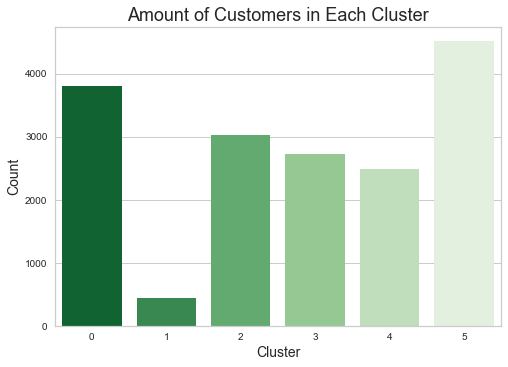

In [129]:
sns.countplot(x=final['cluster'])
plt.title('Amount of Customers in Each Cluster', size = 18)
plt.xlabel('Cluster', size = 14)
plt.ylabel('Count', size = 14);

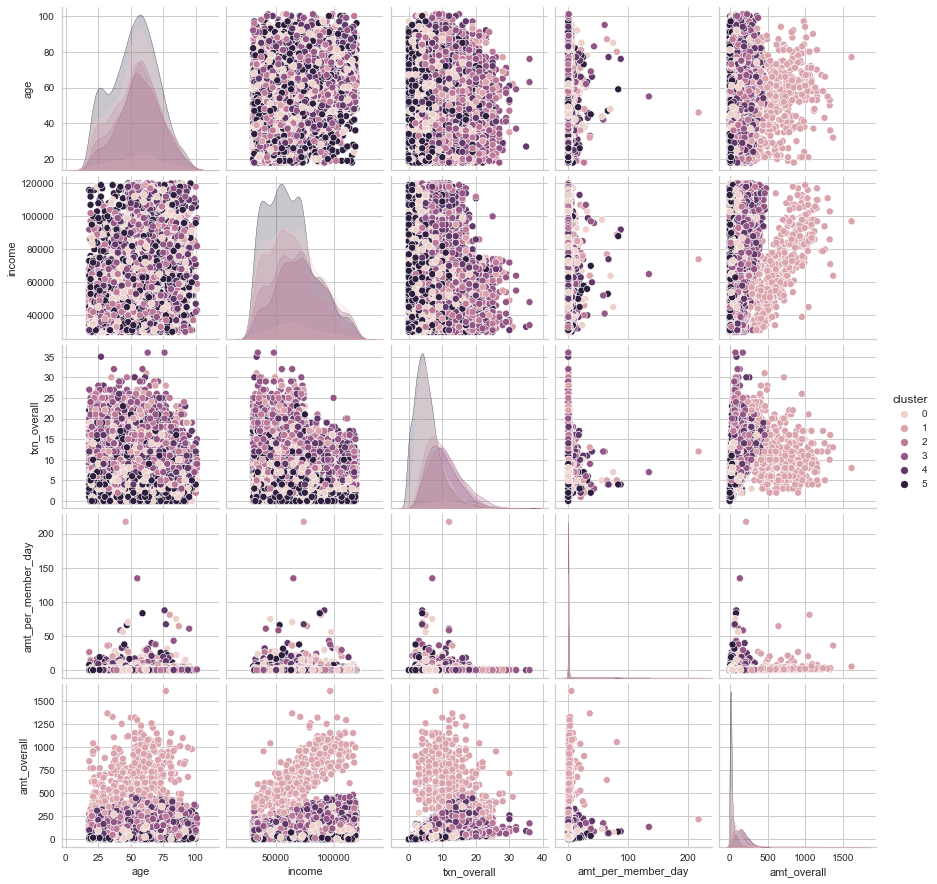

In [11]:
visual_columns = ['age'
                  ,'income'
                  , 'txn_overall'
                  , 'amt_per_member_day'
                  , 'amt_overall'
                  ,'cluster']

sns.pairplot(final[visual_columns], hue='cluster');

## RFM Scores per Cluster

Much higher RFM Scores for all clusters during promotions compared to nonpromos which is to be expected as promos are designed to boost activity. Cluster 5 is the least valuable during both nonpromos and promos and in terms of RFM scores with a mean of 0.95 and 2.59 respectively. The most valuable is Cluster 0 during nonpromos and Cluster 1 during promotions followed by Clusters 0 and 4. 

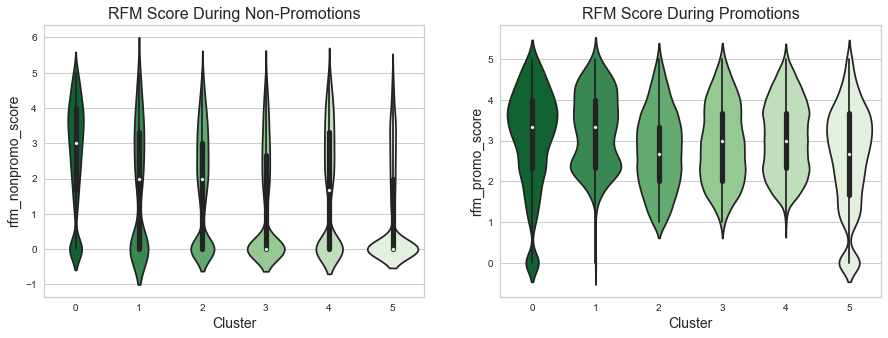

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=final, x='cluster', y='rfm_nonpromo_score', ax=ax1)
ax1.set_title('RFM Score During Non-Promotions', size = 16)
ax1.set_xlabel('Cluster', size = 14)
ax1.set_ylabel('rfm_nonpromo_score', size = 14)

sns.violinplot(data=final, x='cluster', y='rfm_promo_score', ax=ax2)
ax2.set_title('RFM Score During Promotions', size = 16)
ax2.set_xlabel('Cluster', size = 14)
ax2.set_ylabel('rfm_promo_score', size = 14)
plt.savefig('./images/rfm_clusters.png');

In [169]:
final.groupby('cluster')['rfm_nonpromo_score', 'rfm_promo_score'].describe()

rfm_nonpromo_score                                                  \
                     count      mean       std  min   25%   50%   75%  max   
cluster                                                                      
0                   3796.0  2.671351  1.534074  0.0  1.67  3.00  4.00  5.0   
1                    441.0  1.737914  1.695390  0.0  0.00  2.00  3.33  5.0   
2                   3022.0  1.816671  1.549790  0.0  0.00  2.00  3.00  5.0   
3                   2732.0  1.220871  1.535622  0.0  0.00  0.00  2.67  5.0   
4                   2488.0  1.683284  1.678021  0.0  0.00  1.67  3.33  5.0   
5                   4515.0  0.947652  1.440087  0.0  0.00  0.00  2.00  5.0   

        rfm_promo_score                                                  
                  count      mean       std  min   25%   50%   75%  max  
cluster                                                                  
0                3796.0  3.085129  1.219669  0.0  2.33  3.33  4.00  5.0  
1                 441.0  3.277800  0.901059  0.0  2.33  3.33  4.00  5.0  
2                3022.0  2.773051  0.966931  1.0  2.00  2.67  3.33  5.0  
3                2732.0  2.928064  0.956009  1.0  2.00  3.00  3.67  5.0  
4                2488.0  3.084502  0.892927  1.0  2.33  3.00  3.67  5.0  
5                4515.0  2.594921  1.256640  0.0  1.67  2.67  3.67  5.0

## Demographics per Cluster

Cluster 4 has the highest average (72,228) and median (71,500) income of all the clusters followed by Clusters 3 and 1. Cluster 4 also had the highest average and median age. Cluster 5 had the lowest average and median incomes which correlates to their lower RFM scores, as well as the lowest average age. 

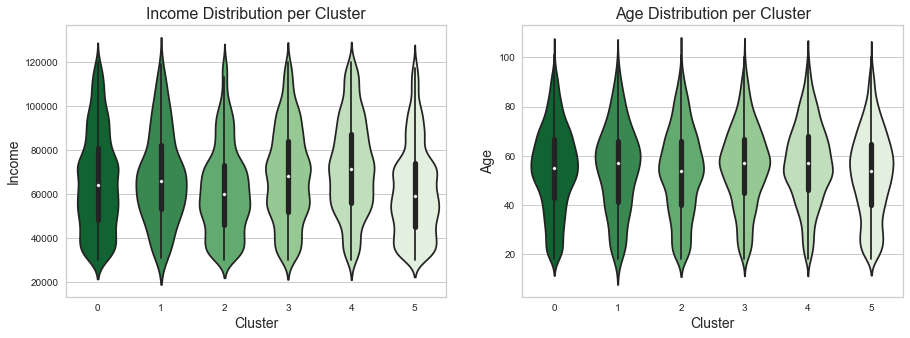

In [207]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=final, x='cluster', y='income', ax=ax1)
ax1.set_title('Income Distribution per Cluster', size = 16)
ax1.set_xlabel('Cluster', size = 14)
ax1.set_ylabel('Income', size = 14)

sns.violinplot(data=final, x='cluster', y='age', ax=ax2)
ax2.set_title('Age Distribution per Cluster', size = 16)
ax2.set_xlabel('Cluster', size = 14)
ax2.set_ylabel('Age', size = 14);

In [177]:
final.groupby('cluster')['income','age'].describe()

income                                                         \
          count          mean           std      min      25%      50%   
cluster                                                                  
0        3796.0  65795.837724  22477.784519  30000.0  48000.0  64000.0   
1         441.0  67510.204082  20503.891209  31000.0  53000.0  66000.0   
2        3022.0  61721.376572  20161.343571  30000.0  46000.0  60000.0   
3        2732.0  68397.877013  21454.067390  30000.0  52000.0  68000.0   
4        2488.0  72228.295820  21489.286546  30000.0  56000.0  71500.0   
5        4515.0  61546.622370  20747.447201  30000.0  45000.0  59000.0   

                               age                                          \
             75%       max   count       mean        std   min   25%   50%   
cluster                                                                      
0        81000.0  120000.0  3796.0  54.514752  17.465661  18.0  43.0  55.0   
1        82000.0  119000.0   441.0  54.630385  17.488227  18.0  41.0  57.0   
2        73000.0  120000.0  3022.0  53.477498  17.860895  18.0  40.0  54.0   
3        84000.0  120000.0  2732.0  55.597731  16.685855  18.0  45.0  57.0   
4        87000.0  120000.0  2488.0  56.840836  16.488435  18.0  46.0  57.0   
5        74000.0  120000.0  4515.0  52.621705  17.699192  18.0  40.0  54.0   

                      
          75%    max  
cluster               
0        67.0  101.0  
1        66.0   97.0  
2        66.0  101.0  
3        67.0  101.0  
4        68.0  100.0  
5        65.0  100.0

## Membership Length per Cluster

Segment 5 generally has more recent customer that joined the rewards program with Segment 3 being the customers with the longest membership length.

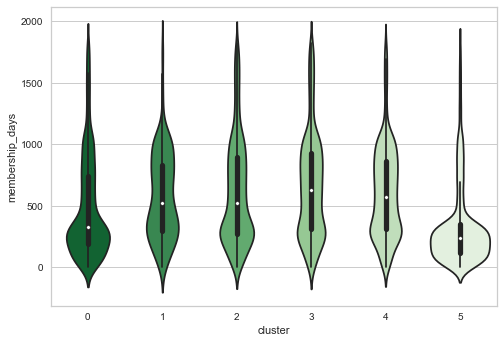

In [152]:
sns.violinplot(data=final, x='cluster', y='membership_days');

In [131]:
final.groupby('cluster')['membership_days'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3796.0,489.368019,414.126179,1.0,189.0,332.0,745.25,1823.0
1,441.0,573.176871,342.036582,1.0,298.0,527.0,832.00,1804.0
2,3022.0,616.774653,430.686828,1.0,272.0,520.0,896.00,1823.0
3,2732.0,670.005490,427.264641,1.0,309.0,625.0,930.00,1824.0
4,2488.0,613.080788,371.819484,1.0,309.0,575.0,867.00,1821.0
5,4515.0,327.861130,328.237977,1.0,121.0,235.0,349.00,1820.0


## Amount Spent with Number of Transactions per Cluster
All clusters seem fairly similar except for Cluster 1 which appears to have outliers that stand out with the highest amount spent per transaction overall. Cluster 0 generally had more numbers of transactions during non promos compared with promotions which also stood out.

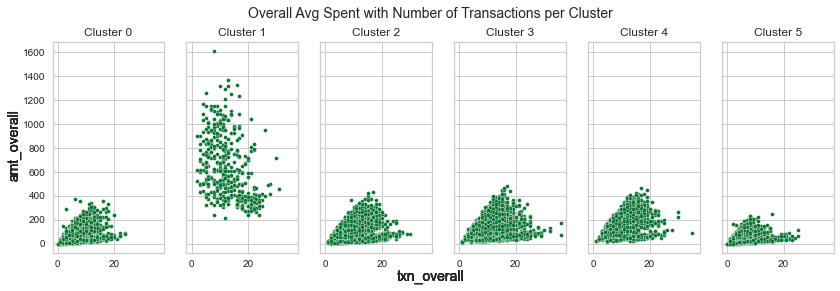

In [208]:
fig, ax = plt.subplots(1, 6, figsize=(14,4), sharey=True, sharex=True)

for i in range(0,6):
    sns.scatterplot(data=final.loc[final['cluster']==i], x='txn_overall', y='amt_overall', ax=ax[i], s=15)
    ax[i].set_title(f'Cluster {i}', size=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    fig.text(0.5, 0.03,'txn_overall', ha='center', size=14)
    fig.text(0.08, 0.5, 'amt_overall', va='center', rotation='vertical', size=14)
    fig.suptitle('Overall Avg Spent with Number of Transactions per Cluster', size=14)
    fig.subplots_adjust(top=0.86)

In [209]:
final.groupby('cluster')['amt_overall','txn_overall'].describe()

amt_overall                                                     \
              count        mean         std     min       25%      50%   
cluster                                                                  
0            3796.0   65.514486   59.280983    0.00   17.2500   46.245   
1             441.0  635.914331  262.466891  217.23  408.1100  596.810   
2            3022.0   97.852449   74.241536    0.97   34.4925   78.855   
3            2732.0  149.761907   82.450591    9.62   81.9400  140.990   
4            2488.0  165.943006   76.042619   13.98  109.5075  157.590   
5            4515.0   28.426206   32.297145    0.00    9.1650   18.100   

                           txn_overall                                       \
              75%      max       count       mean       std  min  25%   50%   
cluster                                                                       
0        101.0375   372.07      3796.0   6.082455  3.723769  0.0  3.0   5.0   
1        823.3200  1608.69       441.0  12.861678  5.981137  2.0  8.0  12.0   
2        145.9625   434.30      3022.0   9.997353  4.797315  1.0  6.0   9.0   
3        202.5725   482.07      2732.0  11.323572  5.350066  1.0  7.0  11.0   
4        212.7800   462.55      2488.0  10.065113  4.537980  1.0  7.0   9.0   
5         33.2050   250.06      4515.0   5.311628  3.887158  0.0  3.0   5.0   

                     
          75%   max  
cluster              
0         8.0  24.0  
1        18.0  31.0  
2        13.0  30.0  
3        14.0  36.0  
4        13.0  35.0  
5         7.0  25.0

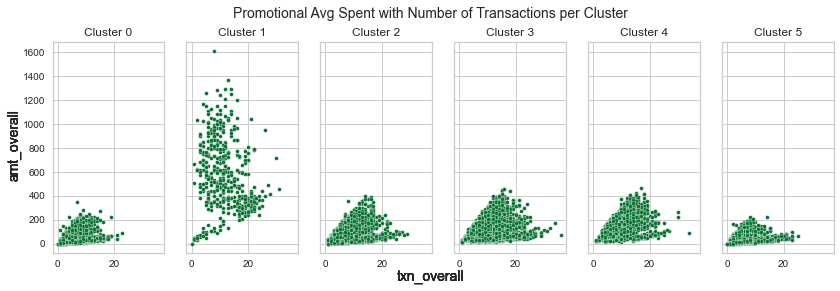

In [210]:
fig, ax = plt.subplots(1, 6, figsize=(14,4), sharey=True, sharex=True)

for i in range(0,6):
    sns.scatterplot(data=final.loc[final['cluster']==i], x='txn_promo', y='amt_promo', ax=ax[i], s=15)
    ax[i].set_title(f'Cluster {i}', size=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    fig.text(0.5, 0.03,'txn_overall', ha='center', size=14)
    fig.text(0.08, 0.5, 'amt_overall', va='center', rotation='vertical', size=14)
    fig.suptitle('Promotional Avg Spent with Number of Transactions per Cluster', size=14)
    fig.subplots_adjust(top=0.86)

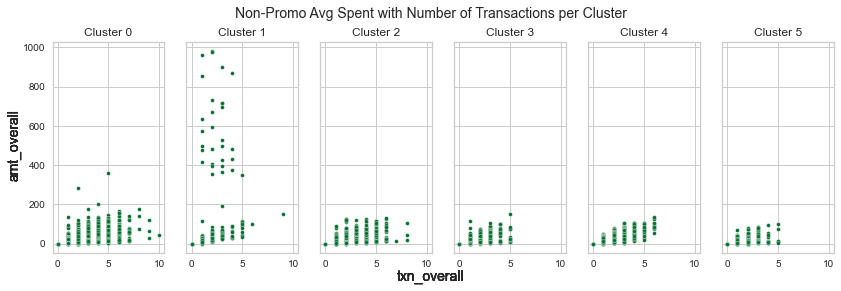

In [211]:
fig, ax = plt.subplots(1, 6, figsize=(14,4), sharey=True, sharex=True)

for i in range(0,6):
    sns.scatterplot(data=final.loc[final['cluster']==i], x='txn_nonpromo', y='amt_nonpromo', ax=ax[i], s=15)
    ax[i].set_title(f'Cluster {i}', size=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    fig.text(0.5, 0.03,'txn_overall', ha='center', size=14)
    fig.text(0.08, 0.5, 'amt_overall', va='center', rotation='vertical', size=14)
    fig.suptitle('Non-Promo Avg Spent with Number of Transactions per Cluster', size=14)
    fig.subplots_adjust(top=0.86)

## Offer Metrics per Cluster

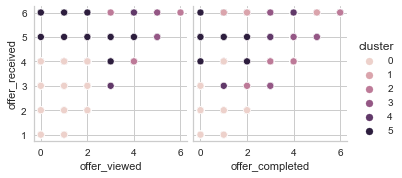

In [212]:
sns.pairplot(final, 
    hue='cluster',
    x_vars=['offer_viewed', 'offer_completed'],
    y_vars=['offer_received'], #diag_kind=None if you get the bug where the dirst variable won't plot
            );

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=final, x='cluster', y='income', ax=ax1)
ax1.set_title('Income Distribution per Cluster', size = 16)
ax1.set_xlabel('Cluster', size = 14)
ax1.set_ylabel('Income', size = 14)

sns.violinplot(data=final, x='cluster', y='age', ax=ax2)
ax2.set_title('Age Distribution per Cluster', size = 16)
ax2.set_xlabel('Cluster', size = 14)
ax2.set_ylabel('Age', size = 14);

## Segment 1 (Cluster 0)

In [9]:
final.columns

Index(['txn_overall', 'amt_overall', 'txn_promo', 'amt_promo', 'txn_nonpromo',
       'amt_nonpromo', 'membership_days', 'age', 'income', 'gender_Blank',
       'gender_F', 'gender_M', 'gender_O', 'offer_received', 'offer_viewed',
       'offer_completed', 'web', 'email', 'mobile', 'social', 'difficulty',
       'duration', 'reward', 'redeemed_reward', 'response_score',
       'bogo_offer_received', 'disc_offer_received', 'info_offer_received',
       'bogo_offer_viewed', 'disc_offer_viewed', 'info_offer_viewed',
       'bogo_offer_completed', 'disc_offer_completed', 'info_offer_completed',
       'bogo_response_score', 'disc_response_score', 'info_response_score',
       'rfm_promo_score', 'rfm_nonpromo_score', 'amt_per_hour',
       'amt_per_member_day', 'amt_per_income', 'cluster'],
      dtype='object')

In [49]:
final[final['cluster']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
txn_overall,2564.0,11.450078,5.334705,1.000000,8.000000,11.000000,15.000000,36.000000
amt_overall,2564.0,162.117863,84.562629,11.300000,94.585000,151.375000,214.360000,463.130000
txn_promo,2564.0,10.771451,5.265116,1.000000,7.000000,10.000000,14.000000,36.000000
amt_promo,2564.0,152.010109,82.165190,11.300000,86.022500,142.765000,202.502500,448.440000
txn_nonpromo,2564.0,0.678627,0.934280,0.000000,0.000000,0.000000,1.000000,5.000000
amt_nonpromo,2564.0,10.107754,16.719403,0.000000,0.000000,0.000000,16.875000,192.420000
membership_days,2564.0,1806.340484,413.203440,1148.000000,1456.750000,1770.000000,2063.000000,2971.000000
age,2564.0,55.960998,16.587842,18.000000,46.000000,57.000000,67.000000,101.000000
income,2564.0,68780.421217,21343.605679,30000.000000,53000.000000,69000.000000,84000.000000,120000.000000
gender_Blank,2564.0,0.025351,0.157220,0.000000,0.000000,0.000000,0.000000,1.000000


## Segment 2

In [36]:
final[final['cluster']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
txn_overall,441.0,12.861678,5.981137,2.000000,8.00,12.000000,18.000000,31.000000
amt_overall,441.0,635.914331,262.466891,217.230000,408.11,596.810000,823.320000,1608.690000
txn_promo,441.0,11.784580,6.062278,0.000000,7.00,11.000000,16.000000,31.000000
amt_promo,441.0,579.921270,288.315221,0.000000,356.46,538.760000,783.090000,1608.690000
txn_nonpromo,441.0,1.077098,1.310256,0.000000,0.00,1.000000,2.000000,9.000000
amt_nonpromo,441.0,55.993061,155.858419,0.000000,0.00,11.410000,31.970000,980.380000
membership_days,441.0,573.176871,342.036582,1.000000,298.00,527.000000,832.000000,1804.000000
age,441.0,54.630385,17.488227,18.000000,41.00,57.000000,66.000000,97.000000
income,441.0,67510.204082,20503.891209,31000.000000,53000.00,66000.000000,82000.000000,119000.000000
gender_Blank,441.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


## Segment 3

In [37]:
final[final['cluster']==2].describe().T

,count,mean,std,min,25%,50%,75%,max
txn_overall,3022.0,9.997353,4.797315,1.00,6.000000,9.000000,13.000000,30.000000
amt_overall,3022.0,97.852449,74.241536,0.97,34.492500,78.855000,145.962500,434.300000
txn_promo,3022.0,8.803111,4.660676,1.00,5.000000,8.000000,12.000000,29.000000
amt_promo,3022.0,85.233908,67.872534,0.38,29.297500,65.705000,124.387500,396.840000
txn_nonpromo,3022.0,1.194242,1.265092,0.00,0.000000,1.000000,2.000000,8.000000
amt_nonpromo,3022.0,12.618541,18.869619,0.00,0.000000,4.305000,18.325000,128.610000
membership_days,3022.0,616.774653,430.686828,1.00,272.000000,520.000000,896.000000,1823.000000
age,3022.0,53.477498,17.860895,18.00,40.000000,54.000000,66.000000,101.000000
income,3022.0,61721.376572,20161.343571,30000.00,46000.000000,60000.000000,73000.000000,120000.000000
gender_Blank,3022.0,0.122766,0.328223,0.00,0.000000,0.000000,0.000000,1.000000


## Segment 4

In [38]:
final[final['cluster']==3].describe().T

,count,mean,std,min,25%,50%,75%,max
txn_overall,2732.0,11.323572,5.350066,1.000000,7.0000,11.0000,14.000000,36.00
amt_overall,2732.0,149.761907,82.450591,9.620000,81.9400,140.9900,202.572500,482.07
txn_promo,2732.0,10.679722,5.285505,1.000000,7.0000,10.0000,14.000000,36.00
amt_promo,2732.0,140.542295,79.724040,9.620000,75.8075,131.1250,190.805000,460.25
txn_nonpromo,2732.0,0.643851,0.904941,0.000000,0.0000,0.0000,1.000000,5.00
amt_nonpromo,2732.0,9.219612,15.545838,0.000000,0.0000,0.0000,15.535000,149.63
membership_days,2732.0,670.005490,427.264641,1.000000,309.0000,625.0000,930.000000,1824.00
age,2732.0,55.597731,16.685855,18.000000,45.0000,57.0000,67.000000,101.00
income,2732.0,68397.877013,21454.067390,30000.000000,52000.0000,68000.0000,84000.000000,120000.00
gender_Blank,2732.0,0.032211,0.176592,0.000000,0.0000,0.0000,0.000000,1.00


## Segment 5

In [39]:
final[final['cluster']==4].describe().T

,count,mean,std,min,25%,50%,75%,max
txn_overall,2488.0,10.065113,4.537980,1.000000,7.0000,9.000000,13.000,35.00
amt_overall,2488.0,165.943006,76.042619,13.980000,109.5075,157.590000,212.780,462.55
txn_promo,2488.0,9.146704,4.446594,1.000000,6.0000,8.000000,12.000,34.00
amt_promo,2488.0,150.846668,74.337510,10.800000,95.6100,142.500000,196.455,462.55
txn_nonpromo,2488.0,0.918408,1.109312,0.000000,0.0000,1.000000,1.000,6.00
amt_nonpromo,2488.0,15.096338,20.077023,0.000000,0.0000,7.620000,24.405,134.80
membership_days,2488.0,613.080788,371.819484,1.000000,309.0000,575.000000,867.000,1821.00
age,2488.0,56.840836,16.488435,18.000000,46.0000,57.000000,68.000,100.00
income,2488.0,72228.295820,21489.286546,30000.000000,56000.0000,71500.000000,87000.000,120000.00
gender_Blank,2488.0,0.006833,0.082394,0.000000,0.0000,0.000000,0.000,1.00


## Segment 6

In [40]:
final[final['cluster']==5].describe().T

,count,mean,std,min,25%,50%,75%,max
txn_overall,4515.0,5.311628,3.887158,0.0,3.000,5.00,7.0000,25.00
amt_overall,4515.0,28.426206,32.297145,0.0,9.165,18.10,33.2050,250.06
txn_promo,4515.0,4.842082,3.773330,0.0,2.000,4.00,7.0000,25.00
amt_promo,4515.0,25.527382,30.263151,0.0,7.465,16.21,29.6000,223.77
txn_nonpromo,4515.0,0.469546,0.759603,0.0,0.000,0.00,1.0000,5.00
amt_nonpromo,4515.0,2.898824,7.972914,0.0,0.000,0.00,1.8700,102.27
membership_days,4515.0,327.861130,328.237977,1.0,121.000,235.00,349.0000,1820.00
age,4515.0,52.621705,17.699192,18.0,40.000,54.00,65.0000,100.00
income,4515.0,61546.622370,20747.447201,30000.0,45000.000,59000.00,74000.0000,120000.00
gender_Blank,4515.0,0.273754,0.445934,0.0,0.000,0.00,1.0000,1.00


# Conclusions

This project highlighted that often times the bulk of a data science problem is the data cleaning and QC and how this can be a very iterative process in your workflow. Regardless of whatever analysis or algorithms you plan to perform on a dataset, the quality of the final analysis is largly dependant on the quality of the data that you are feeding in from the beginning (ie. garbage in, garbage out). This project was no different. After a first round of cleaning, there was more preprocessing needed in order to aggregate and merge everything to the final dataset where each row represents one Starbuck Rewards customer and their associated demographical information, transaction metrics, as well as offers received and if they were used. 

After cleaning and merging the data, StandardScaler and PCA transformations were then performed on the merged dataset which was then fed into a K-Means clustering algorithm after examining different clusters and eventually settling on using 6 clusters to represent each customer segment. With the labeled clusters, I was then able to do a post hoc analysis of each of the customer segments in order to figure out what makes them stand out with regards to their purchasing habits and behavior. These customer segment can now be used to make relevant business decisions and more targeted promotional offerings within the rewards program. 

There is longer term potential for this project to keep developing these customer segments and iterating through this workflow with even more customer data. There is also potential for future work to use these customer segments and implement A/B testing in order to validate some of our findings. 

Goals
Success Criteria / Key Metrics
Data
Overall Approach
Basic description of model
Findings
Risks/Limitations
Impact, next steps, conclusions